First, I will write a function to find $C_v$ using Gaussian quadrature.

In [15]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
import sys
import site
site.addsitedir('/home/deck/comp-phys-golf/tools/GaussQuad')
import gauss_quad as gq

def f(x):
    return (x**4)*np.exp(x) / (np.exp(x) - 1)**2

def cv(T):
    V = 0.001
    rho = 6.022e28
    k = con.k
    thd = 428
    first_part = 9*V*rho*k*(T/thd)**3
    integral = 0
    xog, wog = gq.params(50)
    b = thd/T
    x = 0.5*b*xog + 0.5*b
    w = 0.5*b*wog
    for i in range(len(x)):
        integral += f(x[i])*w[i]
    return first_part*integral

Now, I'll plot the heat capacity as a function of temperature.

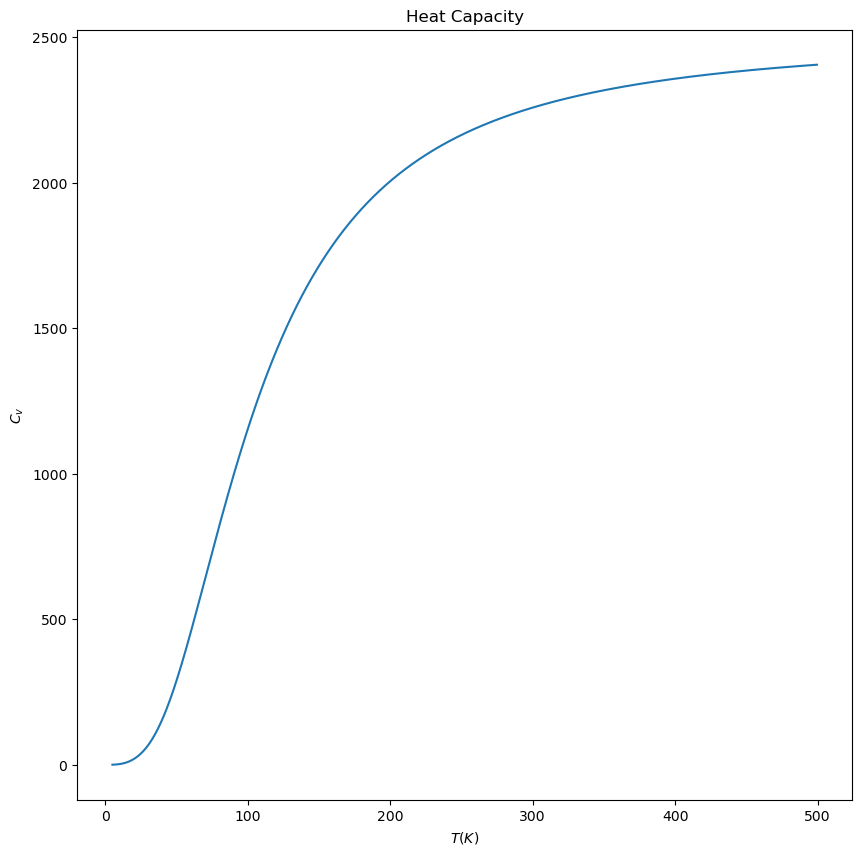

In [17]:
T = np.arange(5, 500, 0.5)
y = []

for i in range(len(T)):
    y.append(cv(T[i]))

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(T, y)
ax.set(xlabel=r'$T (K)$', ylabel=r'$C_v$', title='Heat Capacity')
plt.show()